In [3]:
import tensorflow as tf
import numpy as np

In [5]:
print(tf.ones( (2,1) ))
print(np.ones((2,1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
[[1.]
 [1.]]


In [6]:
print(tf.zeros( (2,1) ))
print(np.zeros((2,1)))

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)
[[0.]
 [0.]]


In [8]:
tf.random.normal( (3,1), mean = 0, stddev = 1)

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 1.6228477 ],
       [-1.2953606 ],
       [ 0.86772376]], dtype=float32)>

In [10]:
x = np.zeros((2,1))
x[0,0] = 10
x

array([[10.],
       [ 0.]])

텐서플로 변수

In [12]:
x = tf.Variable(initial_value=tf.random.normal((3,1)))
x

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.27800536],
       [ 0.15741688],
       [-1.0913972 ]], dtype=float32)>

텐서플로 값 할당

In [13]:
x.assign(tf.ones((3,1)))
x

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [14]:
x[0,0].assign(3)
x

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [15]:
x.assign_add(tf.ones((3,1)))
x

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

텐서플로 기본 수학 연산

In [16]:
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b+c
e = tf.matmul(a,b)
e += d

자동미분 : GradientTape

In [18]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  tape.watch(input_var)
  result = tf.square(input_var)
gradient = tape.gradient(result,input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [20]:
time = tf.Variable(2.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    postion = 4.9*time**2
  speed = inner_tape.gradient(postion,time)
acceleration = outer_tape.gradient(speed,time)
speed,acceleration

(<tf.Tensor: shape=(), dtype=float32, numpy=19.6>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.8>)

텐서플로 선형 분류기

In [22]:
# 데이터 생성
num_samples_per_class = 1000
negative_samples =  np.random.multivariate_normal(
    mean=[0,3],
    cov = [[1, 0.5],[0.5, 1]],  #공분산 행렬 다변수 정규분포
    size = num_samples_per_class
)
positive_samples =  np.random.multivariate_normal(
    mean=[3,0],
    cov = [[1, 0.5],[0.5, 1]],
    size = num_samples_per_class
)

In [24]:
negative_samples, positive_samples

(array([[ 1.00813594,  4.05437406],
        [ 1.31225557,  4.26374075],
        [ 0.78082979,  3.98111721],
        ...,
        [-0.25495576,  2.03715067],
        [ 0.88362466,  4.7405094 ],
        [-2.52377486,  3.19402789]]),
 array([[ 3.21826608,  0.26059944],
        [ 3.04216818, -0.37841257],
        [ 3.01809611, -0.23193512],
        ...,
        [ 2.7934978 , -1.25006673],
        [ 2.51637989, -2.62181338],
        [ 5.2455303 ,  0.54668883]]))

스택에 쌓기

In [40]:
inputs =  np.vstack( (negative_samples, positive_samples) ).astype(np.float32)
targets = np.vstack( (np.zeros((num_samples_per_class,1),dtype='float32'),
                   np.ones((num_samples_per_class,1),dtype='float32'))
                   )

In [ ]:
np.zeros((num_samples_per_class,1),dtype='float32')

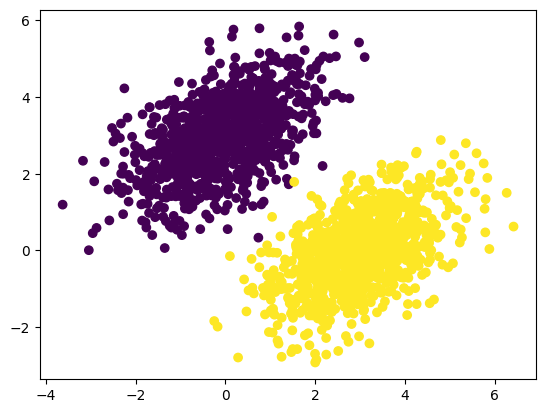

In [41]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1],c = targets[:,0])
plt.show()

In [35]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [36]:
# forward  전방계산 전방패스
def model(inputs):
  return tf.matmul(inputs,W) + b


In [37]:
# 오차함수를 설정  평균제곱오차
def squre_loss(targets, predictions):
  per_sample_lossess = tf.square(targets-predictions)
  return tf.reduce_mean(per_sample_lossess)

In [43]:
# 훈련 스템함수
lr = 0.1
def training_step(inputs,targets):
  with tf.GradientTape() as tape:
    predictions =  model(inputs)
    loss = squre_loss(targets,predictions)
  grad_loss_w, grad_loss_b =  tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_w*lr)
  b.assign_sub(grad_loss_b*lr)
  return loss

In [44]:
# 훈련
for step in range(40):
  loss = training_step(inputs,targets)
  print(f"{step+1} : {loss:.2f}")

1 : 4.37
2 : 0.52
3 : 0.19
4 : 0.14
5 : 0.13
6 : 0.12
7 : 0.11
8 : 0.10
9 : 0.10
10 : 0.09
11 : 0.08
12 : 0.08
13 : 0.07
14 : 0.07
15 : 0.06
16 : 0.06
17 : 0.06
18 : 0.05
19 : 0.05
20 : 0.05
21 : 0.05
22 : 0.05
23 : 0.04
24 : 0.04
25 : 0.04
26 : 0.04
27 : 0.04
28 : 0.04
29 : 0.04
30 : 0.03
31 : 0.03
32 : 0.03
33 : 0.03
34 : 0.03
35 : 0.03
36 : 0.03
37 : 0.03
38 : 0.03
39 : 0.03
40 : 0.03


In [45]:
predictions = model(inputs)
predictions[:3]

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.07950866],
       [0.10790452],
       [0.04811922]], dtype=float32)>

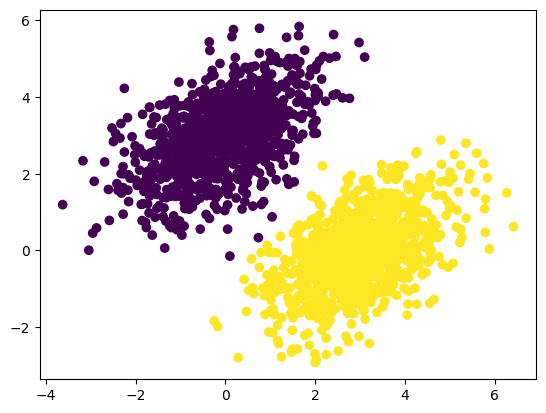

In [49]:
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)

In [54]:
from tensorflow import keras

In [56]:
class SimpleDense(keras.layers.Layer):
  def __init__(self,units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation
  def build(self,input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape = (input_dim, self.units), initializer='random_normal' )
    self.b = self.add_weight(shape = (self.units), initializer='zeros' )
  def call(self,inputs):
    y = tf.matmul(inputs,self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

In [57]:
dense = SimpleDense(units=32,activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2,784))
output_tensor = dense(input_tensor)
output_tensor.shape

TensorShape([2, 32])

동적으로 층 만들기

In [58]:
layer = keras.layers.Dense(32,activation = 'relu')

In [59]:
model = keras.models.Sequential([
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(32)
])

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10,activation='softmax'),
])

In [64]:
model = keras.models.Sequential([
    keras.layers.Dense(1)
])
model.compile(optimizer=keras.optimizers.RMSprop(),loss = keras.losses.MeanSquaredError(),
              metrics=keras.metrics.BinaryAccuracy())

In [65]:
hist = model.fit(inputs,targets,epochs=5,batch_size=128)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 3.0959 - binary_accuracy: 0.0040
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 2.8965 - binary_accuracy: 0.0045
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 2.7297 - binary_accuracy: 0.0060
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 2.5711 - binary_accuracy: 0.0090
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 2.4191 - binary_accuracy: 0.0110


In [66]:
hist.history

{'loss': [3.0958735942840576,
  2.8965048789978027,
  2.729726791381836,
  2.5710644721984863,
  2.4190549850463867],
 'binary_accuracy': [0.004000000189989805,
  0.0044999998062849045,
  0.006000000052154064,
  0.008999999612569809,
  0.010999999940395355]}